# BUILDING MOVING AVERAGE TRADING STRATIGY📊

## For apple stock

In [1]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import seaborn as sns
plt.style.use('seaborn-v0_8')  


#### Downloading stock data using yahoo finanace

In [2]:

ticker = 'AAPL'
start_date = '2020-01-01'
end_date = '2024-12-31'

data = yf.download(ticker, start=start_date, end=end_date)
data.head()


YF.download() has changed argument auto_adjust default to True


[*********************100%***********************]  1 of 1 completed


Price,Close,High,Low,Open,Volume
Ticker,AAPL,AAPL,AAPL,AAPL,AAPL
Date,,,,,
2020-01-02,72.620834,72.681281,71.373211,71.627084,135480400
2020-01-03,71.914818,72.676447,71.689957,71.847118,146322800
2020-01-06,72.487877,72.526564,70.783278,71.034739,118387200
2020-01-07,72.146950,72.753831,71.926922,72.497537,108872000
2020-01-08,73.307503,73.609737,71.849525,71.849525,132079200


 #### Calculate Moving Averages 🧮

In [3]:
# Calculate 50-day and 200-day SMA
data['SMA50'] = data['Close'].rolling(window=50).mean()
data['SMA200'] = data['Close'].rolling(window=200).mean()


In [4]:
# Create signal: 1 = Buy, -1 = Sell
data['Signal'] = 0
data['Signal'][50:] = np.where(data['SMA50'][50:] > data['SMA200'][50:], 1, -1)

# Position: when to hold the stock
data['Position'] = data['Signal'].shift(1)


C:\Users\Prajwal\AppData\Local\Temp\ipykernel_692\2397333694.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Signal'][50:] = np.where(data['SMA50'][50:] > data['SMA200'][50:], 1, -1)


In [5]:
data['Daily Return'] = data['Close'].pct_change()
data['Strategy Return'] = data['Daily Return'] * data['Position']

# Cumulative Returns
data['Cumulative Market Return'] = (1 + data['Daily Return']).cumprod()
data['Cumulative Strategy Return'] = (1 + data['Strategy Return']).cumprod()


#### Plot the Results 📊

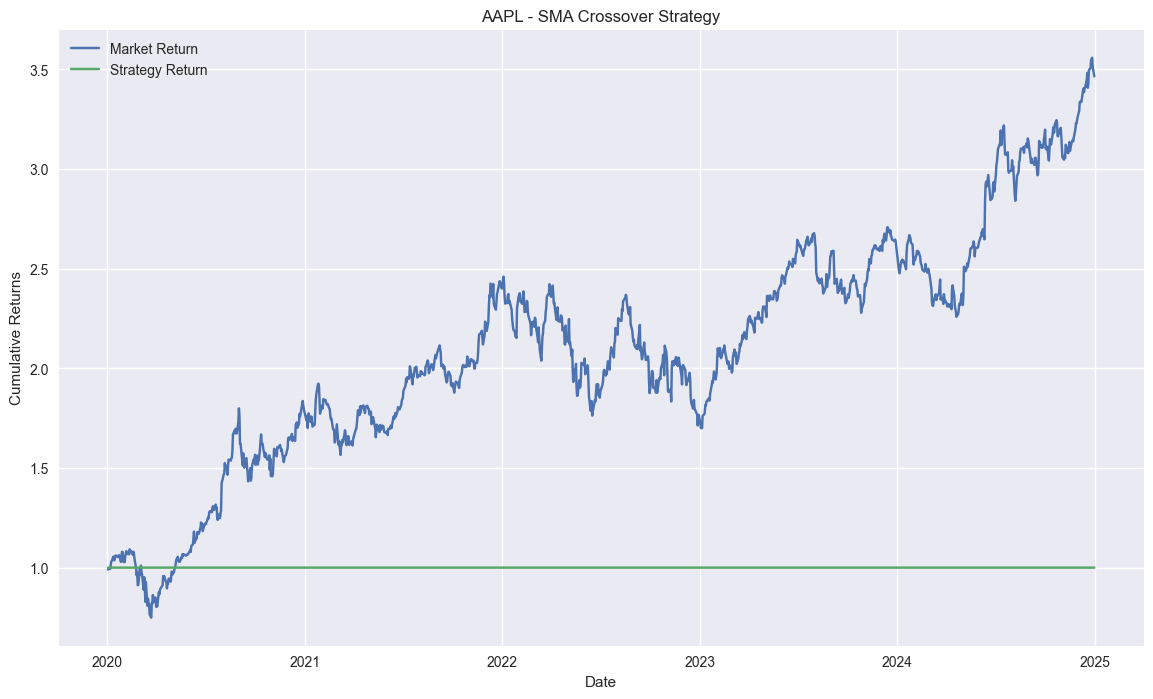

In [6]:
plt.figure(figsize=(14, 8))
plt.plot(data['Cumulative Market Return'], label='Market Return')
plt.plot(data['Cumulative Strategy Return'], label='Strategy Return')
plt.title(f"{ticker} - SMA Crossover Strategy")
plt.xlabel('Date')
plt.ylabel('Cumulative Returns')
plt.legend()
plt.grid(True)
plt.show()


## MOVING AVERAGE FOR HDFC BANK, INFOSYS TRADING STRATIGY📊

[*********************100%***********************]  1 of 1 completed
C:\Users\Prajwal\AppData\Local\Temp\ipykernel_852\2114212364.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Signal'][50:] = np.where(data['SMA50'][50:] > data['SMA200'][50:], 1, -1)


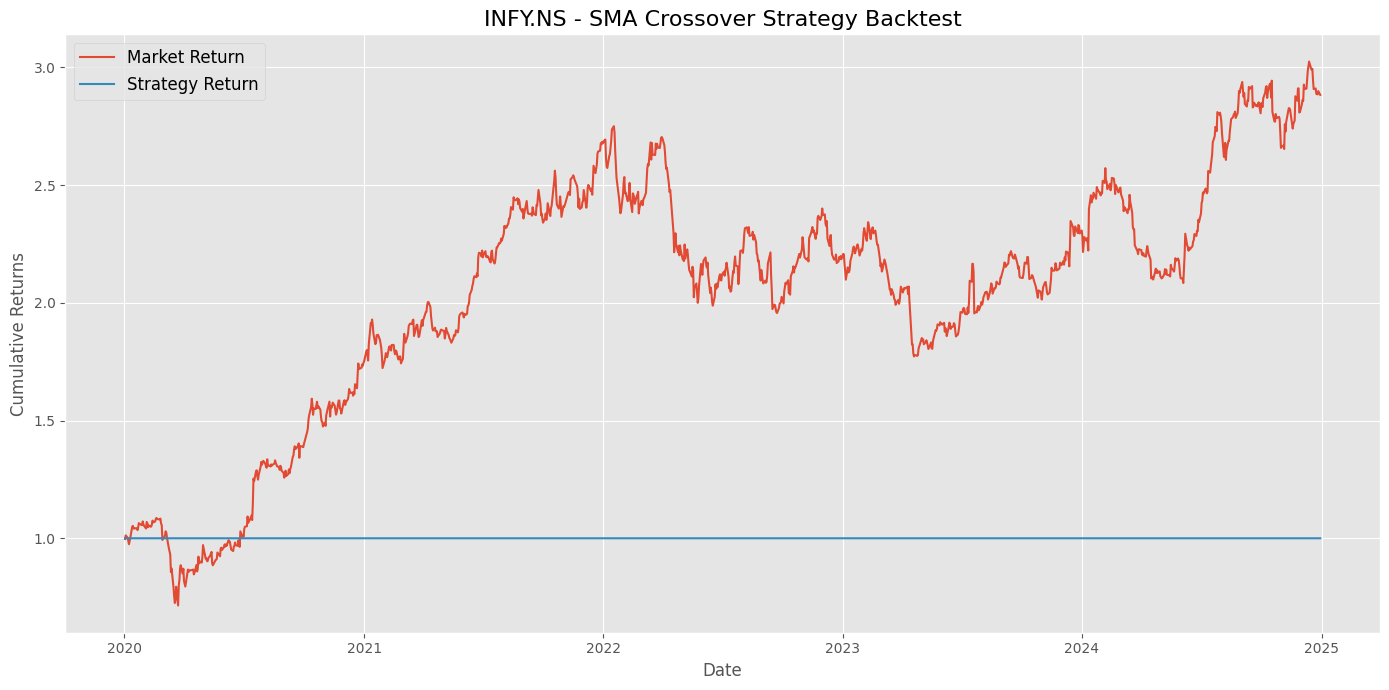

[*********************100%***********************]  1 of 1 completed
C:\Users\Prajwal\AppData\Local\Temp\ipykernel_852\2114212364.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Signal'][50:] = np.where(data['SMA50'][50:] > data['SMA200'][50:], 1, -1)


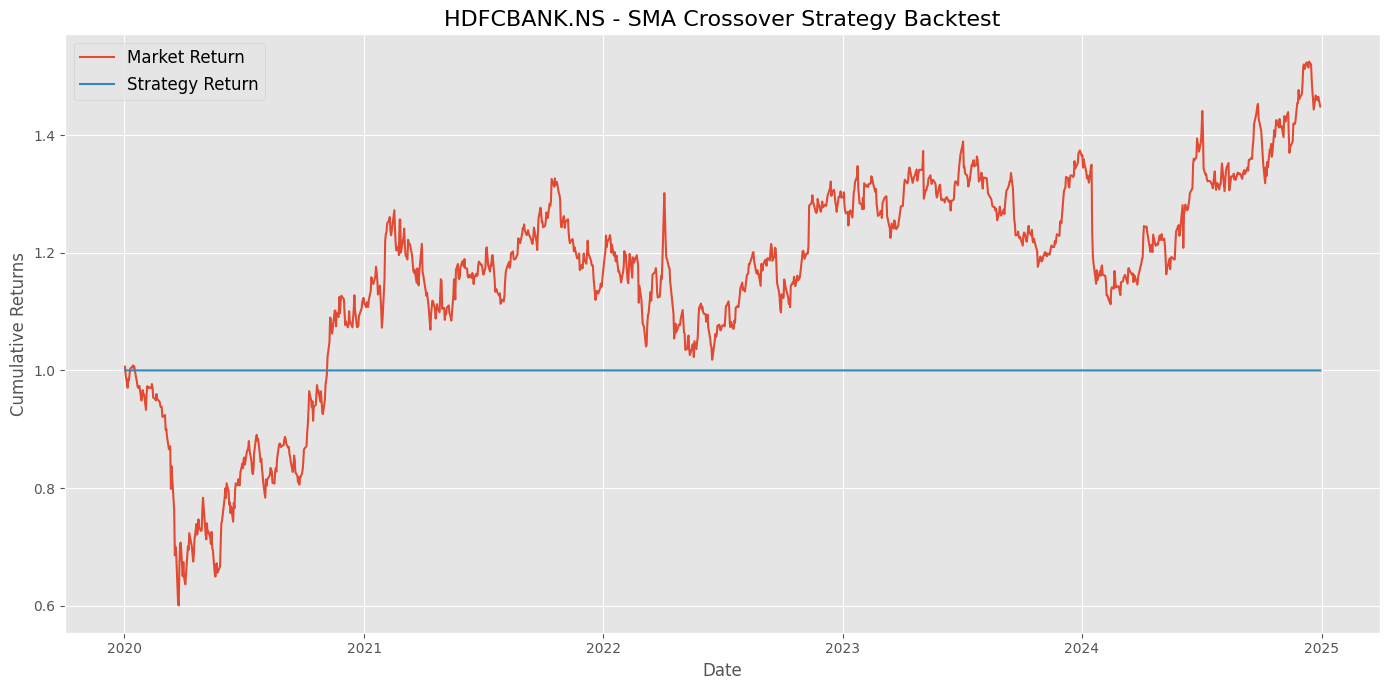

In [3]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

plt.style.use('ggplot')  # or 'fivethirtyeight' for modern look

def backtest_sma_strategy(ticker, start='2020-01-01', end='2024-12-31'):
    # Download data
    data = yf.download(ticker, start=start, end=end)
    
    # Calculate SMAs
    data['SMA50'] = data['Close'].rolling(window=50).mean()
    data['SMA200'] = data['Close'].rolling(window=200).mean()
    
    # Generate signals
    data['Signal'] = 0
    data['Signal'][50:] = np.where(data['SMA50'][50:] > data['SMA200'][50:], 1, -1)
    data['Position'] = data['Signal'].shift(1)
    
    # Calculate returns
    data['Daily Return'] = data['Close'].pct_change()
    data['Strategy Return'] = data['Daily Return'] * data['Position']
    data['Cumulative Market Return'] = (1 + data['Daily Return']).cumprod()
    data['Cumulative Strategy Return'] = (1 + data['Strategy Return']).cumprod()
    
    # Plotting
    plt.figure(figsize=(14, 7))
    plt.plot(data['Cumulative Market Return'], label='Market Return', linewidth=1.5)
    plt.plot(data['Cumulative Strategy Return'], label='Strategy Return', linewidth=1.5)
    plt.title(f"{ticker} - SMA Crossover Strategy Backtest", fontsize=16)
    plt.xlabel("Date", fontsize=12, )
    plt.ylabel("Cumulative Returns", fontsize=12)
    plt.legend(fontsize=12)
    plt.grid(True)
    plt.tight_layout()
    plt.show()
    
    return data

# Run for Infosys and HDFC Bank
data_infy = backtest_sma_strategy("INFY.NS")      # Infosys
data_hdfc = backtest_sma_strategy("HDFCBANK.NS")  # HDFC Bank


## ✅ Updated Function with Buy/Sell Markers

In [4]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

plt.style.use('ggplot')

def backtest_sma_strategy(ticker, start='2020-01-01', end='2024-12-31'):
    # Download data
    data = yf.download(ticker, start=start, end=end)
    
    # Calculate SMAs
    data['SMA50'] = data['Close'].rolling(window=50).mean()
    data['SMA200'] = data['Close'].rolling(window=200).mean()
    
    # Generate signals
    data['Signal'] = 0
    data['Signal'][50:] = np.where(data['SMA50'][50:] > data['SMA200'][50:], 1, -1)
    data['Position'] = data['Signal'].shift(1)
    
    # Calculate returns
    data['Daily Return'] = data['Close'].pct_change()
    data['Strategy Return'] = data['Daily Return'] * data['Position']
    data['Cumulative Market Return'] = (1 + data['Daily Return']).cumprod()
    data['Cumulative Strategy Return'] = (1 + data['Strategy Return']).cumprod()

    # Identify Buy and Sell points
    buy_signals = data[(data['Position'] == 1) & (data['Position'].shift(1) == -1)]
    sell_signals = data[(data['Position'] == -1) & (data['Position'].shift(1) == 1)]

    # Plot price with SMAs and markers
    plt.figure(figsize=(14, 8))
    plt.plot(data['Close'], label='Close Price', alpha=0.5)
    plt.plot(data['SMA50'], label='SMA 50', linewidth=1.5)
    plt.plot(data['SMA200'], label='SMA 200', linewidth=1.5)

    plt.scatter(buy_signals.index, buy_signals['Close'], marker='^', color='green', label='Buy Signal', s=100)
    plt.scatter(sell_signals.index, sell_signals['Close'], marker='v', color='red', label='Sell Signal', s=100)

    plt.title(f"{ticker} - Price with SMA Crossover Signals", fontsize=16)
    plt.xlabel("Date", fontsize=12)
    plt.ylabel("Price", fontsize=12)
    plt.legend(fontsize=12)
    plt.grid(True)
    plt.tight_layout()
    plt.show()

    # Also plot cumulative returns
    plt.figure(figsize=(14, 6))
    plt.plot(data['Cumulative Market Return'], label='Market Return', linewidth=2)
    plt.plot(data['Cumulative Strategy Return'], label='Strategy Return', linewidth=2)
    plt.title(f"{ticker} - Cumulative Returns", fontsize=16)
    plt.xlabel("Date", fontsize=12)
    plt.ylabel("Cumulative Returns", fontsize=12)
    plt.legend(fontsize=12)
    plt.grid(True)
    plt.tight_layout()
    plt.show()
    
    return data


[*********************100%***********************]  1 of 1 completed
C:\Users\Prajwal\AppData\Local\Temp\ipykernel_852\2836337225.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Signal'][50:] = np.where(data['SMA50'][50:] > data['SMA200'][50:], 1, -1)


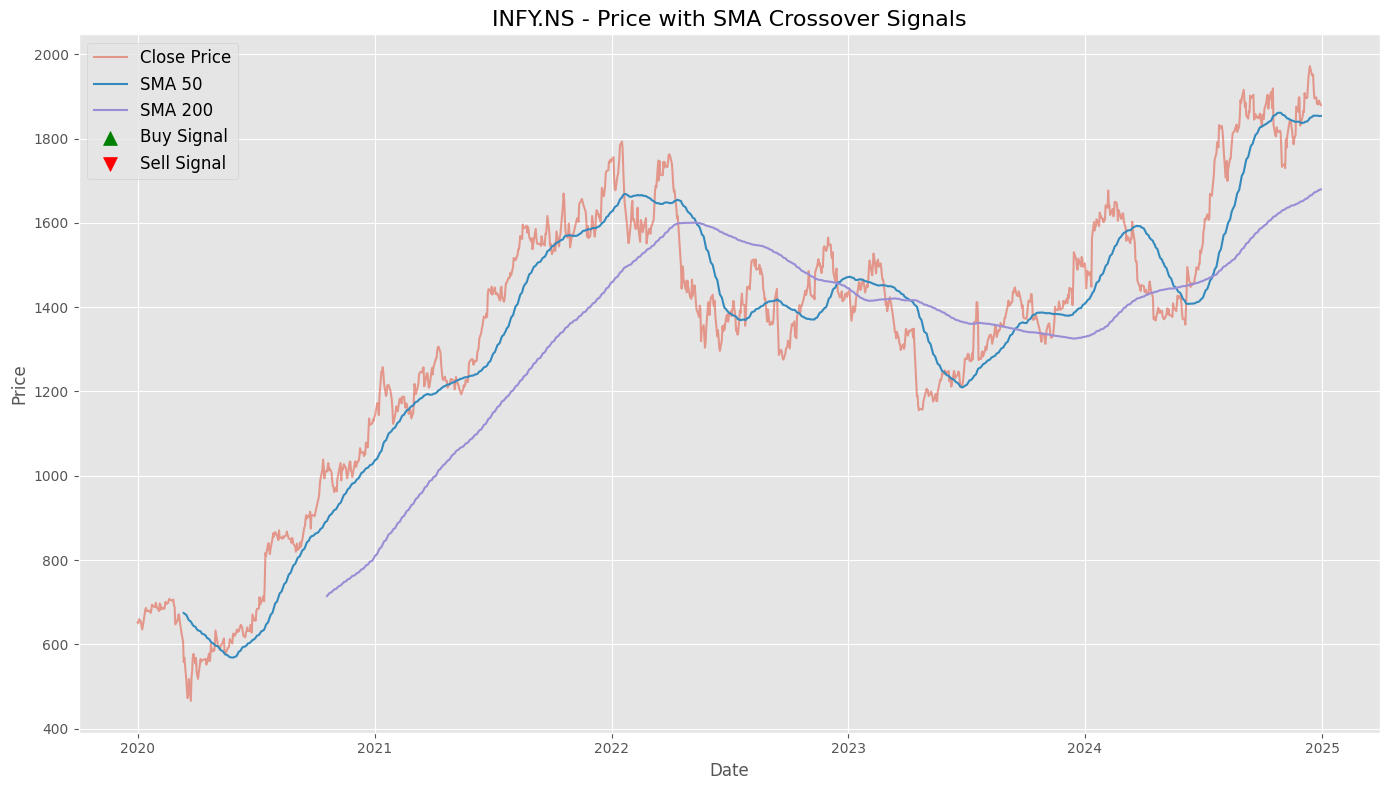

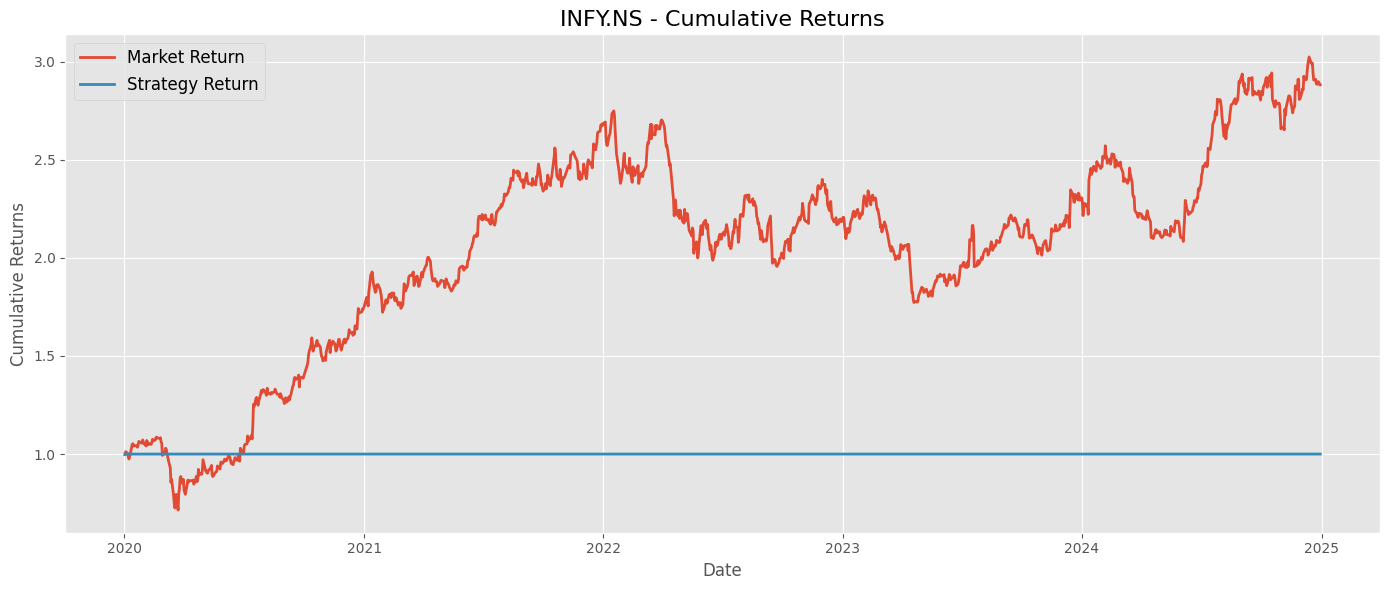

[*********************100%***********************]  1 of 1 completed
C:\Users\Prajwal\AppData\Local\Temp\ipykernel_852\2836337225.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Signal'][50:] = np.where(data['SMA50'][50:] > data['SMA200'][50:], 1, -1)


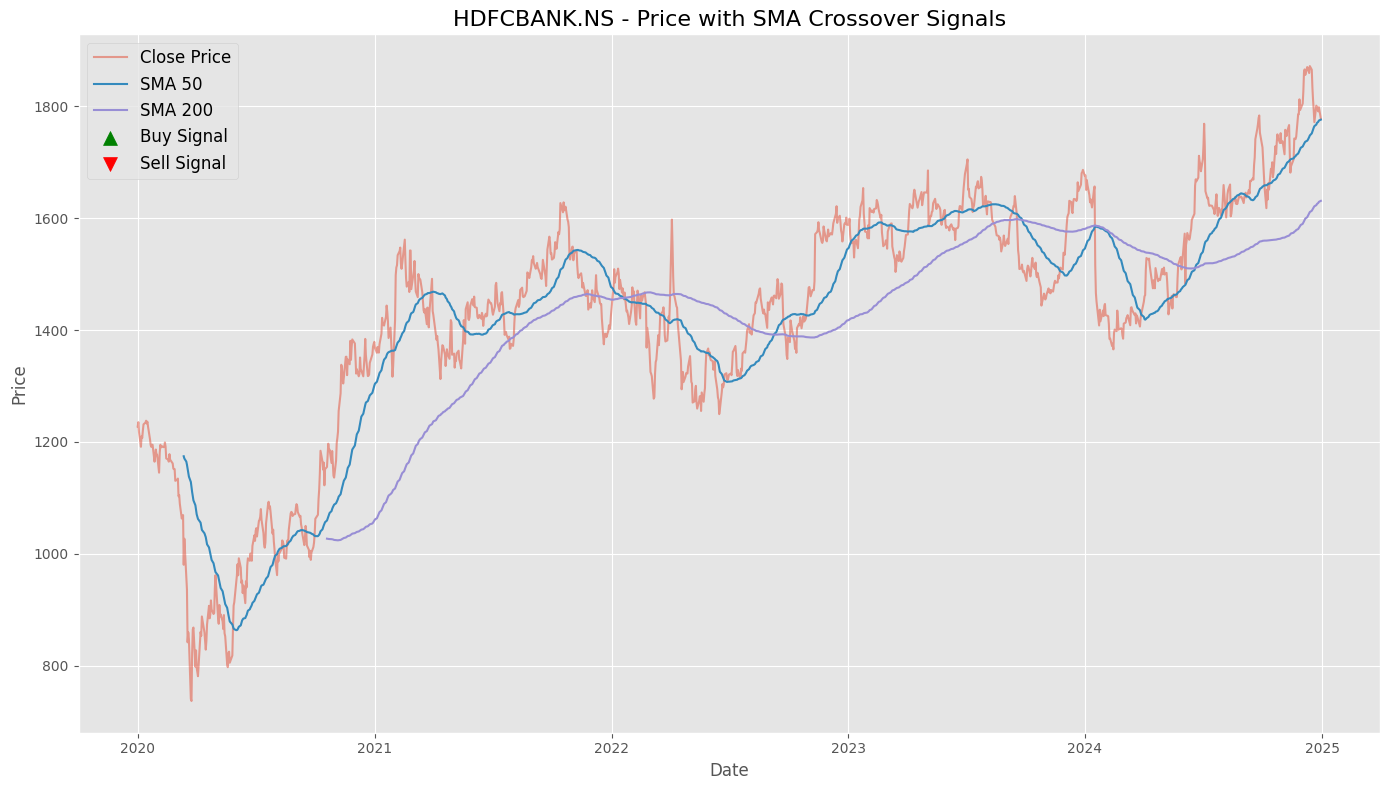

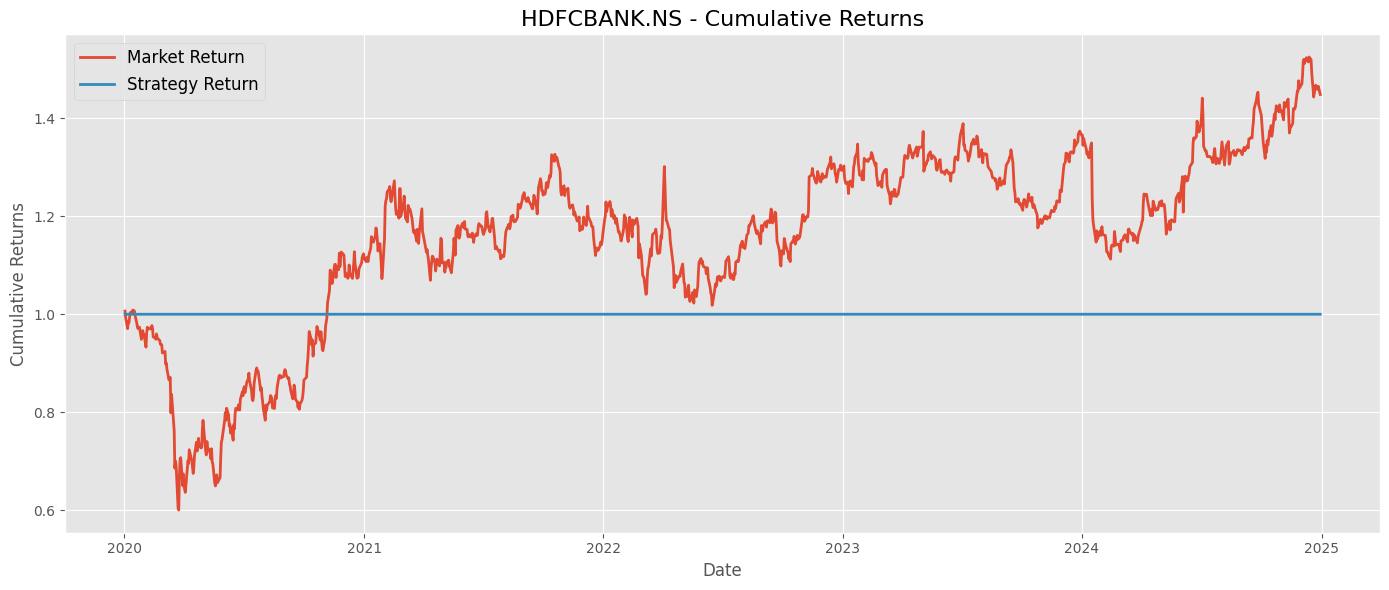

Price,Close,High,Low,Open,Volume,SMA50,SMA200,Signal,Position,Daily Return,Strategy Return,Cumulative Market Return,Cumulative Strategy Return
Ticker,HDFCBANK.NS,HDFCBANK.NS,HDFCBANK.NS,HDFCBANK.NS,HDFCBANK.NS,,,,,,,,
Date,,,,,,,,,,,,,
2020-01-01,1227.428589,1228.772582,1219.748760,1225.028642,1836849,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN
2020-01-02,1235.252441,1236.452415,1227.812607,1227.812607,3068583,NaN,NaN,0,0.0,0.006374,0.0,1.006374,1.0
2020-01-03,1217.636841,1233.572462,1213.028897,1230.884475,5427775,NaN,NaN,0,0.0,-0.014261,-0.0,0.992023,1.0
2020-01-06,1191.285400,1211.301048,1186.533553,1209.573040,5445093,NaN,NaN,0,0.0,-0.021641,-0.0,0.970554,1.0
2020-01-07,1210.149048,1220.564793,1202.133250,1208.517131,7362247,NaN,NaN,0,0.0,0.015835,0.0,0.985922,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-12-23,1801.000000,1806.000000,1781.300049,1782.000000,5522296,1767.147996,1623.174321,0,0.0,0.016653,0.0,1.467295,1.0
2024-12-24,1798.099976,1808.699951,1789.550049,1802.050049,7242917,1770.089995,1625.242350,0,0.0,-0.001610,-0.0,1.464932,1.0


In [5]:
backtest_sma_strategy("INFY.NS")
backtest_sma_strategy("HDFCBANK.NS")


SyntaxError: invalid syntax (2411777038.py, line 1)